In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load Data

In [30]:
#import data
file_path = "building_permits.csv"
df = pd.read_csv(file_path)


/var/folders/9l/bl1wkl2j78726pz7sf5wytdr0000gn/T/ipykernel_2826/697357070.py:3: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


### Data inspection

Lets now analysing the data we are dealing with

In [31]:
df.head()

Permit Number  Permit Type            Permit Type Definition  \
0  201505065519            4                      sign - erect   
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   
3  201611072166            8            otc alterations permit   
4  201611283529            6                       demolitions   

  Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
0           05/06/2015  0326  023            140                  NaN   
1           04/19/2016  0306  007            440                  NaN   
2           05/27/2016  0595  203           1647                  NaN   
3           11/07/2016  0156  011           1230                  NaN   
4           11/28/2016  0342  001            950                  NaN   

  Street Name Street Suffix  ...  Existing Construction Type  \
0       Ellis            St  ...                         3.0   
1       Geary            St  ...                         3.0   
2     Pacific            Av  ...                         1.0   
3     Pacific            Av  ...                         5.0   
4      Market            St  ...                         3.0   

  Existing Construction Type Description Proposed Construction Type  \
0                          constr type 3                        NaN   
1                          constr type 3                        NaN   
2                          constr type 1                        1.0   
3                         wood frame (5)                        5.0   
4                          constr type 3                        NaN   

  Proposed Construction Type Description Site Permit Supervisor District  \
0                                    NaN         NaN                 3.0   
1                                    NaN         NaN                 3.0   
2                          constr type 1         NaN                 3.0   
3                         wood frame (5)         NaN                 3.0   
4                                    NaN         NaN                 6.0   

  Neighborhoods - Analysis Boundaries  Zipcode  \
0                          Tenderloin  94102.0   
1                          Tenderloin  94102.0   
2                        Russian Hill  94109.0   
3                            Nob Hill  94109.0   
4                          Tenderloin  94102.0   

                                    Location      Record ID  
0  (37.785719256680785, -122.40852313194863)  1380611233945  
1   (37.78733980600732, -122.41063199757738)  1420164406718  
2    (37.7946573324287, -122.42232562979227)  1424856504716  
3   (37.79595867909168, -122.41557405519474)  1443574295566  
4   (37.78315261897309, -122.40950883997789)   144548169992  

[5 rows x 43 columns]

In [32]:
df.shape

(198900, 43)

In [33]:
df.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


In [34]:
# Checking for duplicates. Looks like all good
duplicates = df[df.duplicated()]
num_duplicates = duplicates.shape[0]
print(f"Number of Duplicate Rows: {num_duplicates}")

Number of Duplicate Rows: 0


In [35]:
columns = df.columns
for col in columns:
  print(f"Number of distinct values for '{col}' is {df[col].nunique()}")

Number of distinct values for 'Permit Number' is 181495
Number of distinct values for 'Permit Type' is 8
Number of distinct values for 'Permit Type Definition' is 8
Number of distinct values for 'Permit Creation Date' is 1291
Number of distinct values for 'Block' is 4896
Number of distinct values for 'Lot' is 1055
Number of distinct values for 'Street Number' is 5099
Number of distinct values for 'Street Number Suffix' is 18
Number of distinct values for 'Street Name' is 1704
Number of distinct values for 'Street Suffix' is 21
Number of distinct values for 'Unit' is 660
Number of distinct values for 'Unit Suffix' is 164
Number of distinct values for 'Description' is 134272
Number of distinct values for 'Current Status' is 14
Number of distinct values for 'Current Status Date' is 1307
Number of distinct values for 'Filed Date' is 1288
Number of distinct values for 'Issued Date' is 1289
Number of distinct values for 'Completed Date' is 1300
Number of distinct values for 'First Constructi

/var/folders/9l/bl1wkl2j78726pz7sf5wytdr0000gn/T/ipykernel_2826/1294492523.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


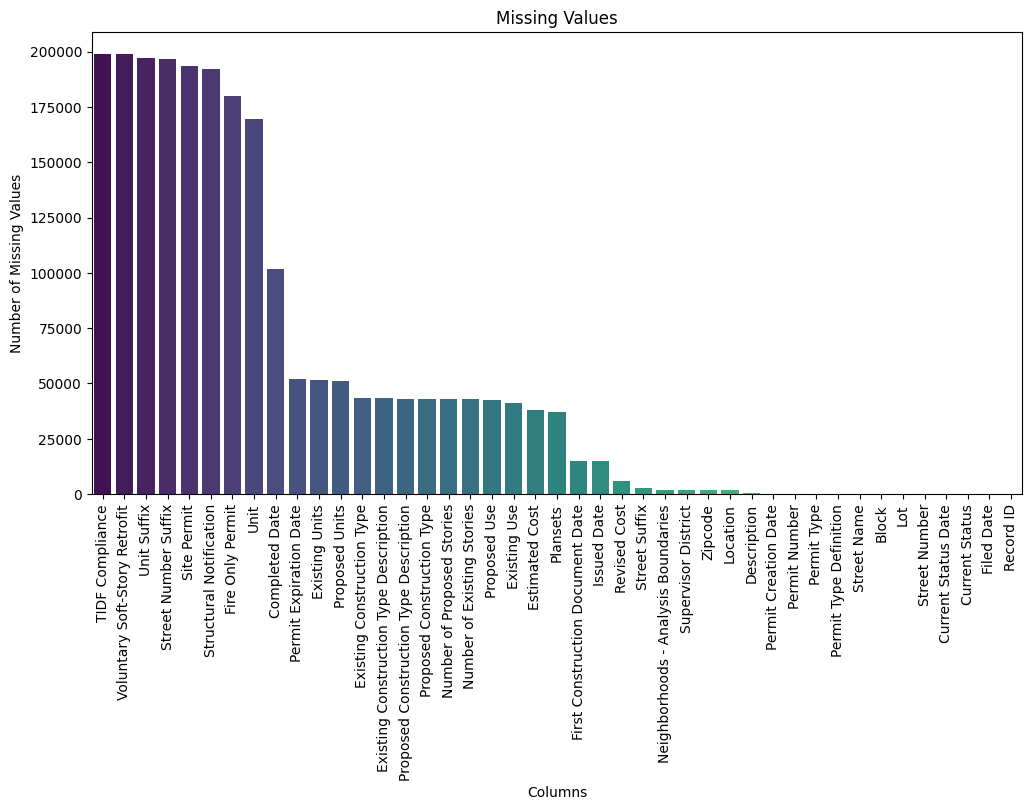

In [36]:
missing_values = df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

#### Lets evaluate the completness of our dataset

In [37]:
#total number of cells
TOT = df.shape[0]*df.shape[1]
#total number of not null values
NOT_NULL = df.count().sum()

In [38]:
COMPLETENESS = NOT_NULL / TOT
COMPLETENESS = '{0:.1f}%'.format(COMPLETENESS*100)
print(COMPLETENESS)

73.7%


### Data Cleaning


In [39]:
# Convert to datetime format
date_columns = ['Permit Creation Date', 'Current Status Date', 'Filed Date', 'Issued Date',
                 'Completed Date', 'First Construction Document Date', 'Permit Expiration Date']
df[date_columns] = df[date_columns].astype('datetime64[ns]')

In [40]:
# Create a new column 
# df['Days_to_Issue'] = (df['Issued Date'] - df['Filed Date']).dt.days

In [41]:
# In uploading file we saw an error for columns 22 and 32. Moreover, they are completely empty or they only have one value
# which does not add any information to the dataset. Let's get rid of them 

columns_to_drop = ['TIDF Compliance', 'Voluntary Soft-Story Retrofit']
df.drop(columns=columns_to_drop, inplace=True)

In [42]:
#For the same permit number we have multiple instances

permit_nums = df['Permit Number'].value_counts()
permit_nums


Permit Number
201602179765    101
201602179758     66
201602179775     30
201702239990      9
201708165004      9
               ... 
M842987           1
M843007           1
M843807           1
M845227           1
201802232143      1
Name: count, Length: 181495, dtype: int64

/var/folders/9l/bl1wkl2j78726pz7sf5wytdr0000gn/T/ipykernel_2826/3688145319.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distinct_values.index, y=distinct_values.values, palette="viridis")


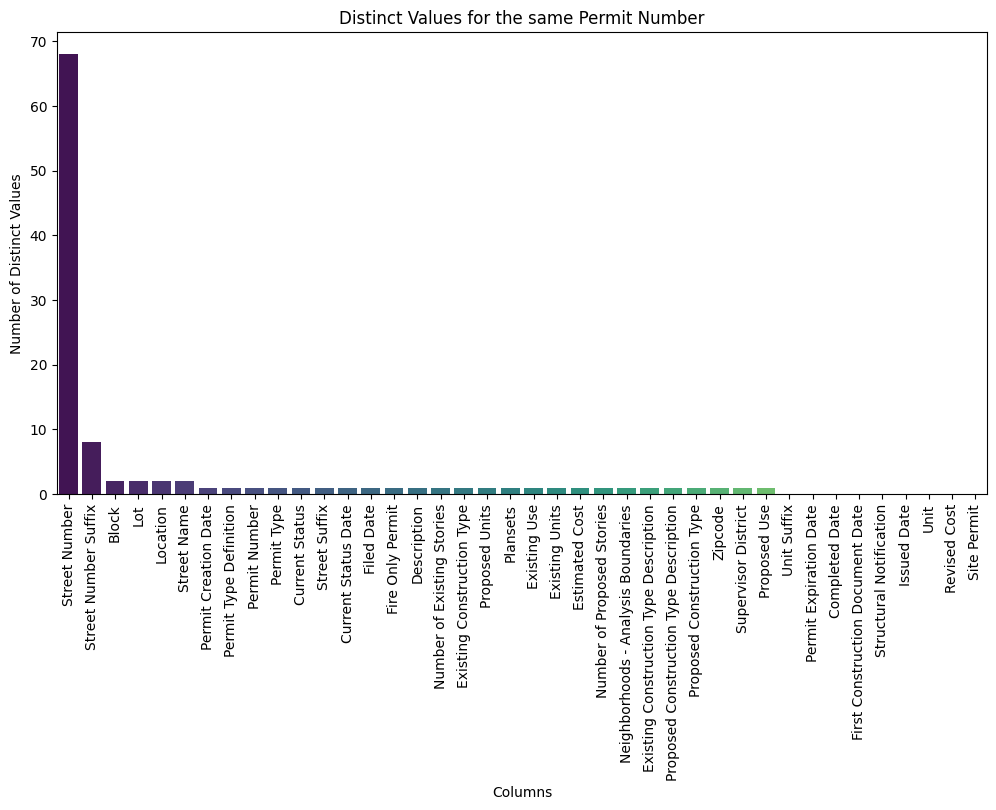

In [43]:
#Lets analyze one single permit number and understand what are the differences between the samples

#Creating a dataframe with a single permit number 
permits = pd.DataFrame(df[df['Permit Number'] == '201602179765'])
columns = permits.columns


#removing Record ID column which is unique
permits.drop(columns='Record ID', inplace=True)
#Plotting the number of distinct values for each feature
distinct_values = permits.nunique().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=distinct_values.index, y=distinct_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Distinct Values for the same Permit Number')
plt.xlabel('Columns')
plt.ylabel('Number of Distinct Values')
plt.show()


We realize that the only differences are in the location (e.g. street, block, lot) so we assumed that this is not an error but these permits cuold be related to different buildings inside the same condominium.

### Handling missing values

In [44]:
# Columns have only 'Y' = 'Yes' option. Let's transform it to boolean format and get rid of the nulls replacing them with False

df['Fire Only Permit'] = df['Fire Only Permit'].map({'Y': True, np.nan: False})
df['Structural Notification'] = df['Structural Notification'].map({'Y': True, np.nan: False})
df['Site Permit'] = df['Site Permit'].map({'Y': True, np.nan: False})

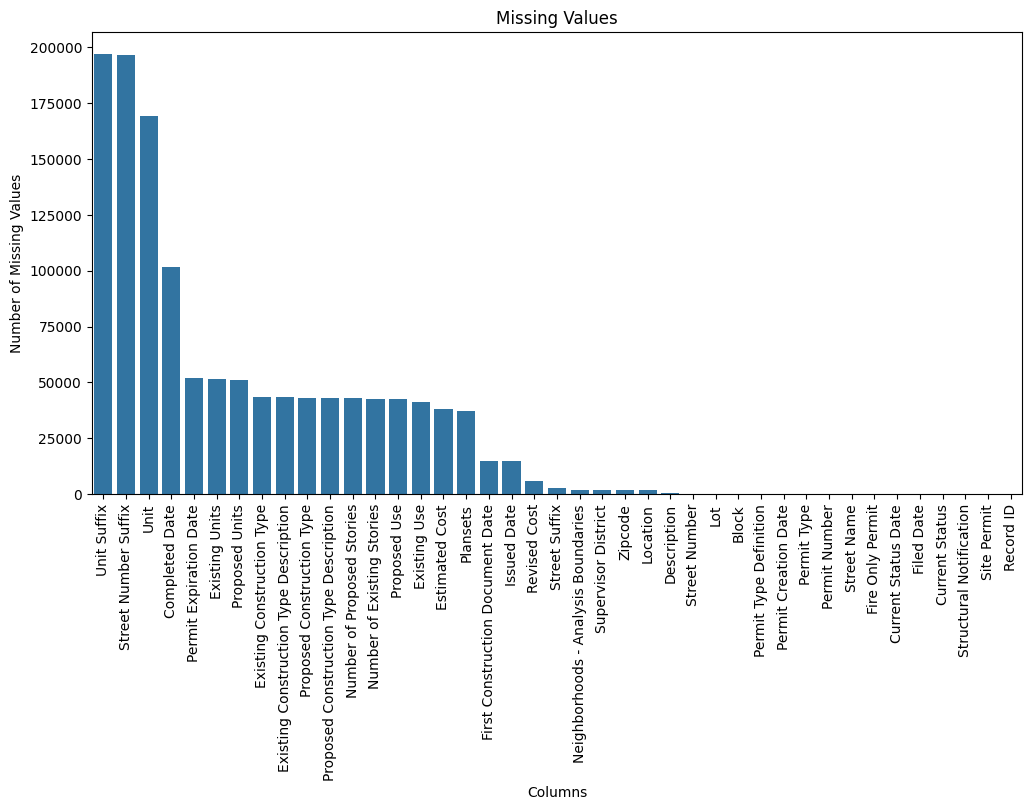

In [47]:
#Lets now print agian the number of missing values per features

missing_values = df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

'Completed date' has a relatively high number of missing values lets see if these are legit e.g if Current Status != “Complete” 

In [51]:
completed_permits = pd.DataFrame({
    'Current Status': df['Current Status'],
    'Completed Date': df['Completed Date']
})

In [60]:
# Define the statuses that require a 'Completed Date'
statuses_requiring_completed_date = ['complete']

# Filter rows with null 'Completed Date' and where 'Current Status' is in the given list
invalid_rows = completed_permits[
    completed_permits['Current Status'].str.lower().isin(statuses_requiring_completed_date)
]

print(invalid_rows)

       Current Status Completed Date
3            complete     2017-07-24
6            complete     2017-07-12
48           complete     2017-10-31
91           complete     2017-09-08
92           complete     2017-10-04
98           complete     2017-10-13
99           complete     2017-10-10
101          complete     2017-09-28
104          complete     2018-01-19
105          complete     2017-09-22
107          complete     2017-10-03
108          complete     2017-08-22
109          complete     2017-09-14
110          complete     2017-07-21
111          complete     2017-12-04
113          complete     2017-12-22
114          complete     2017-09-20
117          complete     2017-07-28
120          complete     2017-08-30
121          complete     2017-08-11
122          complete     2017-07-26
123          complete     2017-07-03
126          complete     2017-12-28
128          complete     2017-08-01
129          complete     2017-10-16
130          complete     2017-10-18
1

In [62]:
# Define the statuses that require a 'Completed Date'
statuses_requiring_completed_date = ['complete']

# Filter rows with null 'Completed Date' and where 'Current Status' is in the given list
invalid_rows = completed_permits[
    completed_permits['Completed Date'].isnull() & 
    completed_permits['Current Status'].str.lower().isin(statuses_requiring_completed_date)
]

print(f'Number of invalid rows: {invalid_rows.shape[0]}')

Number of invalid rows: 0


We found that all the missing values regarding the Completed date are legit so there no need for further analysis

### Correlation

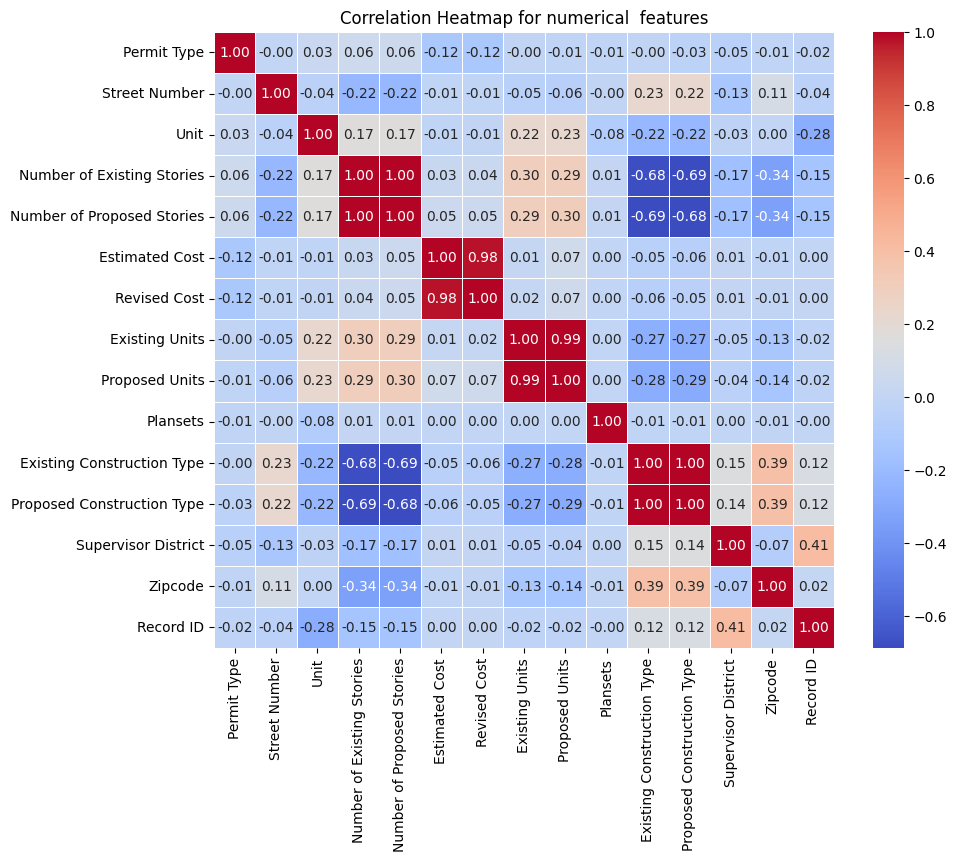

In [ ]:
#display coorelation between numeric columns
NUM = list(df.select_dtypes(include=['int64','float64']).columns)
df[NUM].corr(method='pearson')


# Compute the correlation matrix for numeric columns using pearson coefficient
correlation_matrix = df[NUM].corr(method='pearson')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Heatmap for numerical features')
plt.show()